In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
training = pd.read_csv("fraudTrain.csv")

In [3]:
testing = pd.read_csv("fraudTest.csv")

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
training.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
testing.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
training.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
testing.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
training['trans_date_trans_time'] = pd.to_datetime(training['trans_date_trans_time'])
training['dob'] = pd.to_datetime(training['dob'])

training['transaction_year'] = training['trans_date_trans_time'].dt.year
training['transaction_month'] = training['trans_date_trans_time'].dt.month
training['transaction_day'] = training['trans_date_trans_time'].dt.day
training['transaction_hour'] = training['trans_date_trans_time'].dt.hour

training['birth_year'] = training['dob'].dt.year
training['birth_month'] = training['dob'].dt.month
training['birth_day'] = training['dob'].dt.day

In [11]:
training.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.011293,-82.048315,0,2019,1,1,0,1988,3,9
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,49.159047,-118.186462,0,2019,1,1,0,1978,6,21
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,43.150704,-112.154481,0,2019,1,1,0,1962,1,19
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,47.034331,-112.561071,0,2019,1,1,0,1967,1,12
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.674999,-78.632459,0,2019,1,1,0,1986,3,28


In [12]:
training.drop(['trans_date_trans_time', 'dob','Unnamed: 0'], axis=1, inplace=True)

In [13]:
training.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,36.011293,-82.048315,0,2019,1,1,0,1988,3,9
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,49.159047,-118.186462,0,2019,1,1,0,1978,6,21
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,43.150704,-112.154481,0,2019,1,1,0,1962,1,19
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,47.034331,-112.561071,0,2019,1,1,0,1967,1,12
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,38.674999,-78.632459,0,2019,1,1,0,1986,3,28


In [14]:
testing['trans_date_trans_time'] = pd.to_datetime(testing['trans_date_trans_time'])
testing['dob'] = pd.to_datetime(testing['dob'])

testing['transaction_year'] = testing['trans_date_trans_time'].dt.year
testing['transaction_month'] = testing['trans_date_trans_time'].dt.month
testing['transaction_day'] = testing['trans_date_trans_time'].dt.day
testing['transaction_hour'] = testing['trans_date_trans_time'].dt.hour

testing['birth_year'] = testing['dob'].dt.year
testing['birth_month'] = testing['dob'].dt.month
testing['birth_day'] = testing['dob'].dt.day

In [15]:
testing.drop(['trans_date_trans_time', 'dob','Unnamed: 0'], axis=1, inplace=True)

In [16]:
testing.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,33.986391,-81.200714,0,2020,6,21,12,1968,3,19
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,39.450498,-109.960431,0,2020,6,21,12,1990,1,17
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,40.495810,-74.196111,0,2020,6,21,12,1970,10,21
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,28.812398,-80.883061,0,2020,6,21,12,1987,7,25
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,44.959148,-85.884734,0,2020,6,21,12,1955,7,6


In [17]:
training.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
testing.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()

    
    training[col] = le.fit_transform(training[col])

    
    testing[col] = le.fit_transform(testing[col])


In [19]:
training.head()

,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,2703186189652095,514,8,4.97,0,27,28654,36.0788,-81.1781,3495,...,36.011293,-82.048315,0,2019,1,1,0,1988,3,9
1,630423337322,241,4,107.23,0,47,99160,48.8878,-118.2105,149,...,49.159047,-118.186462,0,2019,1,1,0,1978,6,21
2,38859492057661,390,0,220.11,1,13,83252,42.1808,-112.2620,4154,...,43.150704,-112.154481,0,2019,1,1,0,1962,1,19
3,3534093764340240,360,2,45.00,1,26,59632,46.2306,-112.1138,1939,...,47.034331,-112.561071,0,2019,1,1,0,1967,1,12
4,375534208663984,297,9,41.96,1,45,24433,38.4207,-79.4629,99,...,38.674999,-78.632459,0,2019,1,1,0,1986,3,28


In [20]:
testing.head()

,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,2291163933867244,319,10,2.86,1,39,29209,33.9659,-80.9355,333497,...,33.986391,-81.200714,0,2020,6,21,12,1968,3,19
1,3573030041201292,591,10,29.84,0,43,84002,40.3207,-110.4360,302,...,39.450498,-109.960431,0,2020,6,21,12,1990,1,17
2,3598215285024754,611,5,41.28,0,33,11710,40.6729,-73.5365,34496,...,40.495810,-74.196111,0,2020,6,21,12,1970,10,21
3,3591919803438423,222,9,60.05,1,8,32780,28.5697,-80.8191,54767,...,28.812398,-80.883061,0,2020,6,21,12,1987,7,25
4,3526826139003047,292,13,3.19,1,21,49632,44.2529,-85.0170,1126,...,44.959148,-85.884734,0,2020,6,21,12,1955,7,6


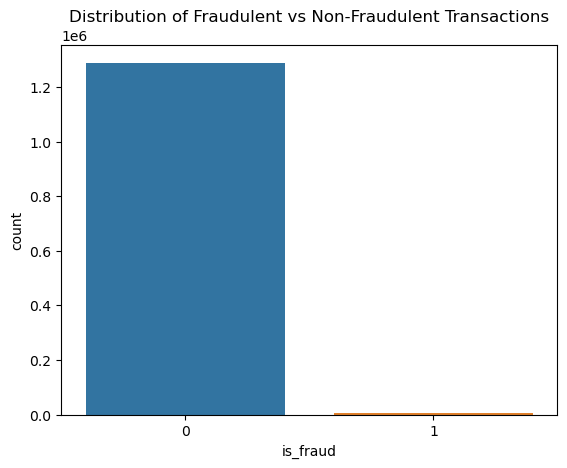

In [21]:
sns.countplot(data=training, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

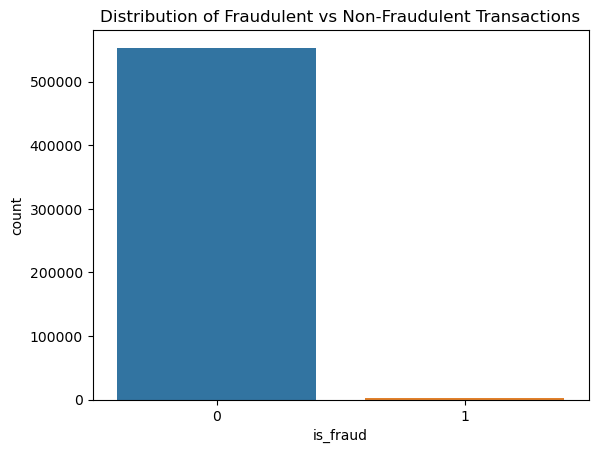

In [22]:
sns.countplot(data=testing, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

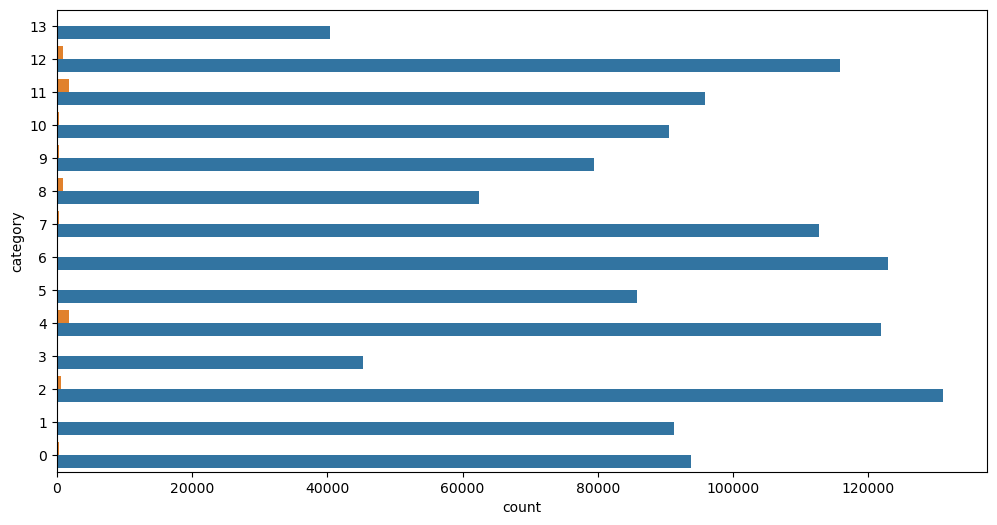

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=training, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

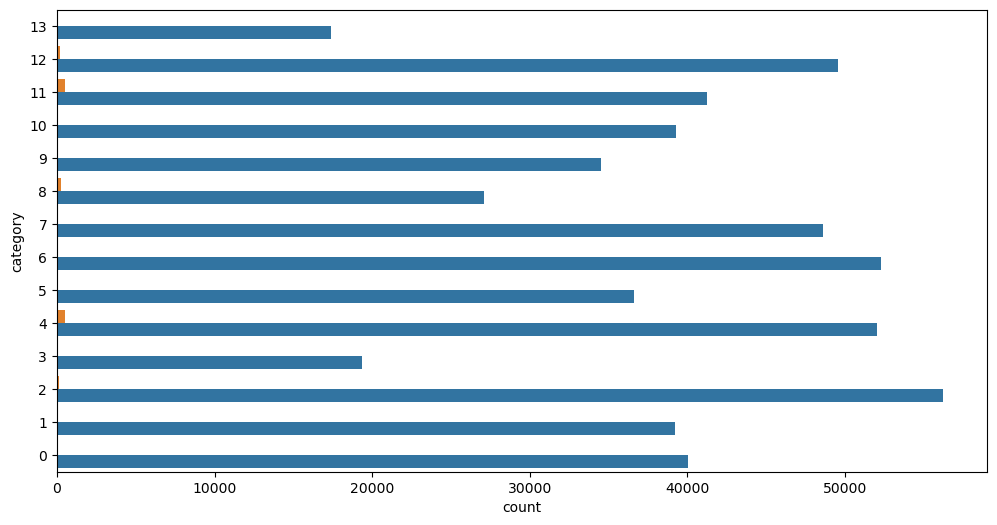

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=testing, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.show()

In [29]:
xtrain = training.drop(["is_fraud"],axis=1)
ytrain = training['is_fraud']
xtest = testing.drop(["is_fraud"],axis=1)
ytest = testing['is_fraud']

In [30]:
print("Before Sampling",sum(ytrain==1))
print("Before Sampling",sum(ytrain==0))

Before Sampling 7506
Before Sampling 1289169


In [31]:
print("Before Sampling",sum(ytest==1))
print("Before Sampling",sum(ytest==0))

Before Sampling 2145
Before Sampling 553574


In [32]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=0)

Xsampled,ysampled=sm.fit_resample(xtrain,ytrain)

In [33]:
print("after  Sampling",sum(ysampled==1))
print("after Sampling",sum(ysampled==0))


after  Sampling 1289169
after Sampling 1289169


<Axes: xlabel='is_fraud'>

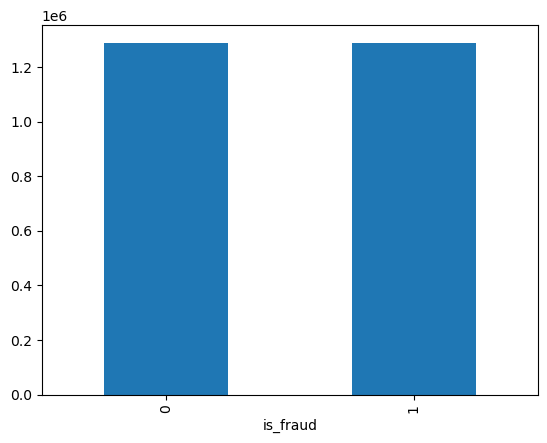

In [36]:
ysampled.value_counts().plot(kind="bar")

In [38]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(Xsampled, ysampled)
y_pred = log_model.predict(xtest)
print(classification_report(ytest, y_pred))
print(confusion_matrix(ytest, y_pred))
print("Accuracy:", accuracy_score(ytest, y_pred))

c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

[[553574      0]
 [  2145      0]]
Accuracy: 0.9961401355721147


c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(Xsampled, ysampled)

y_pred = tree_model.predict(xtest)
print(classification_report(ytest, y_pred))
print(confusion_matrix(ytest, y_pred))
print("Accuracy:", accuracy_score(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.03      0.71      0.06      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.81      0.51    555719
weighted avg       1.00      0.92      0.95    555719

[[509324  44250]
 [   628   1517]]
Accuracy: 0.9192433586038987
